## **K means clustering**

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
data = [
    [1, 4], [2, 5], [1, 2], [4, 9], [0, 2], [9, 3], [3, 4], [2, 7], [3, 9], [1, 9],
    [5, 8], [3, 2], [2.3, 4.9], [3.1, 6.4], [4.1, 2.3], [2.6, 8.5], [3.9, 2.3],
    [8, 1], [2, 5], [3, 3], [4, 4.5], [7.6, 6.7], [8.4, 4.8], [9.1, 1.9]
]


In [ ]:
list_1 =[]
k_vals = np.arange(1,11,1)
for k in k_vals:
    kmeans = KMeans(n_clusters=k ,n_init=10)
    kmeans.fit(data)
    list_1.append(kmeans.inertia_)#calculates and appends  within-cluster sum of squares

plt.plot(k_vals, list_1)
plt.xlabel('Values of k')
plt.ylabel('LIST_1')
plt.show()
# now using elbow method we take k =3

In [ ]:
arr_x = np.arange(1.0,25.0,1.0)
i=0
while i<24 :
  arr_x[i] = data[i][0] 
  i+=1
arr_y = np.arange(1.0,25.0,1.0)
i=0
while i<24 :
  arr_y[i] = data[i][1] 
  i+=1
df = pd.DataFrame({'x': arr_x, 'y': arr_y})
scaler = MinMaxScaler()
scaler.fit(df[['y']])
df[['y']] = scaler.transform(df[['y']])
scaler.fit(df[['x']])
df[['x']] = scaler.transform(df[['x']])
km =KMeans(n_clusters =3)
y_pred = km.fit_predict(df[['x' , 'y']])
df['cluster'] = y_pred
df_1 = df[ df.cluster==0]
df_2 = df[ df.cluster ==1]
df_3 = df[ df.cluster==2]
plt.scatter(df_1.x , df_1.y )
plt.scatter(df_2.x , df_2.y )
plt.scatter(df_3.x , df_3.y )

## **Hierarchical Clustering**

In [ ]:

Z_hier = linkage(data, method='ward')
dendrogram(Z_hier)
plt.title(' The Dendrogram')


In [ ]:
  i=3
  while i<8 :
    dendrogram(Z_hier, truncate_mode='lastp', p=i)
    plt.title(' The Dendrogram with ' + str(i) + ' clusters')
    plt.show()
    i+=1

In [ ]:
#single linkage
Z_hier = linkage(data, method='single')
dendrogram(Z_hier)
plt.title(' The Dendrogram')

In [ ]:
#complete linkage
Z_hier = linkage(data, method='complete')
dendrogram(Z_hier)
plt.title(' The Dendrogram')

## ***Image Segmentation***

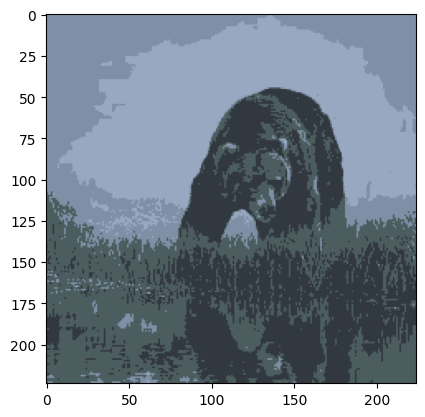

In [82]:
import cv2
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bear.jpg" )
img_org = img
img = img.reshape((-1,3))
img = np.float32(img)
crt = criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.9)
k=4
retval, labels, centers = cv2.kmeans(img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center_2 = np.uint8(centers)
segmented_img = center_2[labels.flatten()]
segmented_image = segmented_img.reshape((img_org.shape))
plt.imshow(segmented_image)



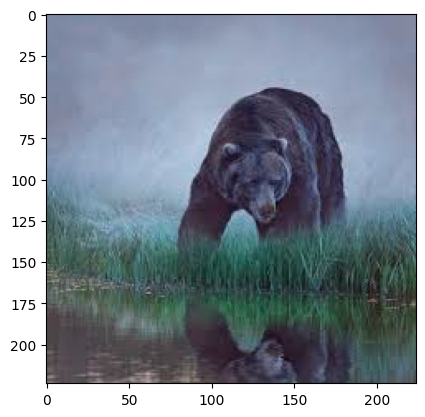

In [83]:
plt.imshow(img_org)